In [8]:
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image

img = np.asarray(Image.open("Moon.jpg"))


Width = img.shape[0]
Height = img.shape[1]

tst = np.ones([20,20])

img_fd = np.fft.fft2(img)
img_fd_shifted = np.fft.fftshift(img_fd)



In [9]:
def HP_filter_FD(W,H,D0,n):
    HP = np.zeros([W,H])
    c_i = (W//2)
    c_j = (H//2)
    for i in range(-c_i,c_i):
        for j in range(-c_j,c_j):
            dist = np.sqrt((i ** 2) + (j ** 2))
            if dist != 0:
                HP[c_i+i,c_j+j] = 1 / (1 + (D0/dist)**(2*n))
    return HP

In [20]:
def HB_filter_FD(W,H,D0,A,n):
    HP = HP_filter_FD(W,H,D0,n)
    A_mat = np.ones([W,H]) * (A-1)
    HB = np.add(A_mat,HP)
    return HB

(<matplotlib.axes._subplots.AxesSubplot at 0x1dc794c3130>,
 <matplotlib.image.AxesImage at 0x1dc7958ac10>)

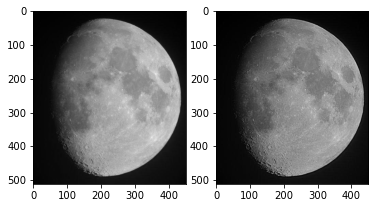

In [24]:


HB = HB_filter_FD(Width,Height,50,2,2)

newimg_FD = np.multiply(HB,img_fd_shifted)

newimg_fd_unshifted = np.fft.ifftshift(newimg_FD)
newimg = np.fft.ifft2(newimg_fd_unshifted)
newimg = np.abs(newimg)





plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.subplot(122),plt.imshow(newimg, cmap = 'gray')